In [1]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [17]:
train_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_train.csv')
predict_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_test.csv')

train_data=train_data.drop(columns='Client_ID')
predict_data=predict_data.drop(columns='Client_ID')

cat_cols=['Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS',
       'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV',
       'PAY_DEC']
train_data = pd.get_dummies( train_data,columns = cat_cols )
predict_data=pd.get_dummies( predict_data,columns = cat_cols )

In [25]:
print(train_data.isnull().sum().sum(),predict_data.isnull().sum().sum())

0 0


In [73]:
only_in_train=[x for x in train_data if x not in predict_data]
only_in_predict=[x for x in predict_data if x not in train_data] #this  should be []


In [85]:
#make the no of predict_data columns same as the train_data
for col in only_in_train:
    if col=='NEXT_MONTH_DEFAULT':
        pass
    else:
        predict_data[col]=np.zeros((len(predict_data[predict_data.keys()[0]]),1))
        

In [86]:
new_balance_limit_v1=[]
for data in train_data['Balance_Limit_V1']:
    if data[-1]=='K':
        data=str(float(data[:-1])*1000)
    elif data[-1]=='M':
        data=str(float(data[:-1])*1000000)
    new_balance_limit_v1.append(data)
train_data['Balance_Limit_V1']=new_balance_limit_v1

new_balance_limit_v1=[]
for data in predict_data['Balance_Limit_V1']:
    if data[-1]=='K':
        data=str(float(data[:-1])*1000)
    elif data[-1]=='M':
        data=str(float(data[:-1])*1000000)
    new_balance_limit_v1.append(data)
predict_data['Balance_Limit_V1']=new_balance_limit_v1

In [145]:
X_train, X, y_train, y = train_test_split(train_data.drop('NEXT_MONTH_DEFAULT',axis=1),train_data['NEXT_MONTH_DEFAULT'],test_size = 0.3,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X,y,test_size = 0.5,shuffle=False) 

In [146]:
std_scale = StandardScaler().fit(X_train)
X_train = pd.DataFrame(std_scale.transform(X_train))
X_test  = pd.DataFrame(std_scale.transform(X_test))
X_predict  = pd.DataFrame(std_scale.transform(predict_data))

C:\Users\Udith\anaconda_\envs\opencv\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Udith\anaconda_\envs\opencv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  
C:\Users\Udith\anaconda_\envs\opencv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Udith\anaconda_\envs\opencv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


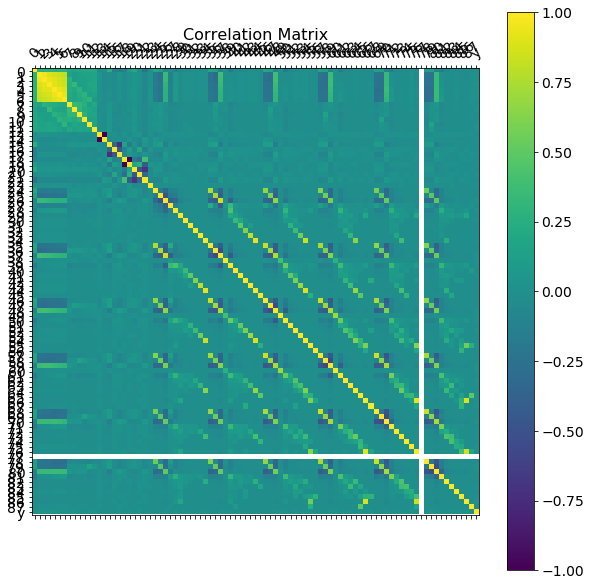

In [154]:
#pd.plotting.scatter_matrix(X_train,figsize=(30,30))
df=X_train
df['y']=y_train
f = plt.figure(figsize=(10,10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [92]:
X_train=np.array(X_train) #(16800, 88) 
X_test=np.array(X_test) #(3600, 88) 
X_val=np.array(X_val) #(3600, 88) 
y_train=np.array(y_train) #(16800,)
y_test=np.array(y_test) #(3600,)
y_val=np.array(y_val) #(3600,)
X_predict=np.array(X_predict) #(6000,88)
print('\nSHAPES\n',X_train.shape,'\n',X_test.shape,'\n',X_val.shape,'\n',y_train.shape,'\n',y_test.shape,'\n',y_val.shape,'\n',X_predict.shape)

n_features=X_train.shape[1]
print('no of features :',n_features)


pd.DataFrame(X_train).to_csv("data/X_train.csv")
pd.DataFrame(X_test).to_csv("data/X_test.csv")
pd.DataFrame(X_val).to_csv("data/X_val.csv")
pd.DataFrame(y_train).to_csv("data/y_train.csv")
pd.DataFrame(y_test).to_csv("data/y_test.csv")
pd.DataFrame(y_val).to_csv("data/y_val.csv")
pd.DataFrame(X_predict).to_csv("data/X_predict.csv")

%store X_train
%store X_test
%store X_val
%store y_train
%store y_test
%store y_val
%store X_predict




SHAPES
 (16800, 88) 
 (3600, 88) 
 (3600, 88) 
 (16800,) 
 (3600,) 
 (3600,) 
 (6000, 88)
no of features : 88
Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'X_val' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'y_val' (ndarray)
Stored 'X_predict' (ndarray)


In [ ]:
%matplotlib inline
df=pd.DataFrame()
df['op']=y_train
for i in range(88):
    df['ip']=X_train[:,5]
    pd.plotting.scatter_matrix(df,figsize=(5,5))

no of features : 88


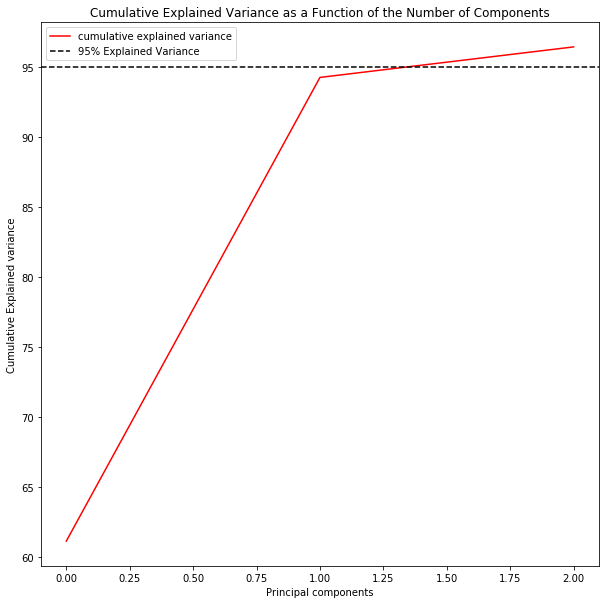

In [133]:
#analyse variance by PCA curve


pca_dims=3   ###### number of wanted PCA dims

print('no of features :',n_features)

pca = PCA(n_components=pca_dims)
X_train_pca=pca.fit_transform(X_train)  
X_test_pca=pca.fit_transform(X_test)  
X_val_pca=pca.fit_transform(X_val)  

################################### plot PCA- CURVE ##########################################################################

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')


In [140]:
pca_reduced=pd.DataFrame(X_train_pca)
y=pd.DataFrame()
y['target']=y_train
n=0
m=1
o=2

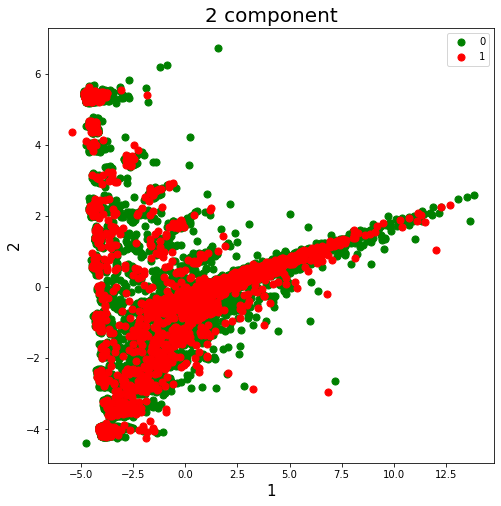

In [144]:
principalDf = pd.DataFrame(data = pca_reduced , columns = [n, m])#,'PC3'])
y_train_df = pd.DataFrame(data = y , columns = ['target'])


finalDf = pd.concat([principalDf, y_train_df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)#, projection='3d')
ax.set_xlabel('1', fontsize = 15)
ax.set_ylabel('2', fontsize = 15)
#ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('2 component', fontsize = 20)
targets = [0,1]
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, n]
               , finalDf.loc[indicesToKeep, m]#,finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
    
    
ax.legend(targets)